In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os

pd.set_option('display.max_rows',500) 

![CRISP_DM](crisp_dm2.png)

# Data Preparation

* focus is always to understand the final data structure
* support each step with visuals analytics


Sources of data are:

* Johns Hoppkins University (GITHUB) : https://github.com/CSSEGISandData/COVID-19.git


In [2]:
data_path = (r'C:\Users\patka\enterprise_data_science-covid-19\data\raw\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv')

pd_raw=pd.read_csv(data_path)

pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180784,180864,180864,180864,180864,181120,181178,181236,181465,181534
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276518,276583,276638,276690,276731,276731,276821,276821,276821,277141
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265909,265920,265925,265925,265927,265937,265943,265952,265964,265968
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43224,43224,43449,43449,43449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [3]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/8/22', '6/9/22', '6/10/22', '6/11/22', '6/12/22', '6/13/22',
       '6/14/22', '6/15/22', '6/16/22', '6/17/22'],
      dtype='object', length=878)

In [4]:
time_idx = pd_raw.columns[4:]

In [5]:
df_plot = pd.DataFrame({
    'date':time_idx
})

df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [7]:
pd_raw[pd_raw['Country/Region'] =='Germany'].iloc[:,4::].sum(axis=0)

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
6/13/22    26915085
6/14/22    27007429
6/15/22    27096571
6/16/22    27124689
6/17/22    27204953
Length: 878, dtype: int64

In [8]:
country_list=['Italy', 'US', 'Spain', 'Germany', 'Korea, South']

In [9]:
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region'] == each].iloc[:,4::].sum(axis=0))

In [10]:
df_plot

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3
...,...,...,...,...,...,...
873,6/13/22,17664043,85666440,12478994,26915085,18239056
874,6/14/22,17703887,85758512,12515127,27007429,18248479
875,6/15/22,17736696,85941290,12515127,27096571,18256457
876,6/16/22,17773764,86057735,12515127,27124689,18263643


<AxesSubplot:xlabel='date'>

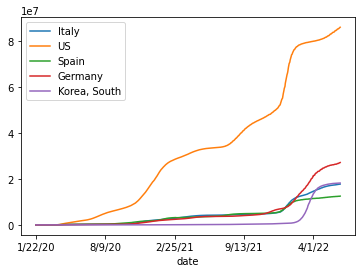

In [11]:
%matplotlib inline
df_plot.set_index('date').plot()

# Data Type Date 

In [12]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [13]:
df_plot.date[0]

'1/22/20'

In [14]:
#datetime.strptime(df_plot.date[0], "%m/%d/%Y") #Upper case 'y' necessary

In [15]:
# converting datetime format

time_idx = [datetime.strptime(each ,"%m/%d/%y") for each in df_plot.date] #Upper case 'y' necessary

time_idx[0:5]

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0)]

In [16]:
# converting datetime into ISO format

time_str = [each.strftime('%Y-%m-%d')for each in time_idx]

time_str[0:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

In [17]:
#Changing Current working directory from Raw to Processed

os.chdir("C:/Users/patka/enterprise_data_science-covid-19/data/processed")

print(os.getcwd())

C:\Users\patka\enterprise_data_science-covid-19\data\processed


In [18]:
df_plot.to_csv('C:/Users/patka/enterprise_data_science-covid-19/data/processed/COVID_small_flat_table.csv', sep=';', index = False)

# Relational Data model- defining a primary key

In the relational model of database, a primary key is a specific choice of a minimal set of attributesn (columns) that uniquely specify a tuple (row) in a relation (table) 

A primary key's main features are: 

* It must contain a unique vakue for each row of data
* It cannot contain null values

In [19]:
data_path = (r'C:\Users\patka\enterprise_data_science-covid-19\data\raw\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv')

pd_raw=pd.read_csv(data_path)

pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180784,180864,180864,180864,180864,181120,181178,181236,181465,181534
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276518,276583,276638,276690,276731,276731,276821,276821,276821,277141
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265909,265920,265925,265925,265927,265937,265943,265952,265964,265968
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43224,43224,43449,43449,43449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [20]:
pd_data_base = pd_raw.rename(columns = {'Country/Region' : 'country',
                                       'Province/State' : 'state'})

In [21]:
pd_data_base = pd_data_base.drop(['Lat', 'Long'], axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,180784,180864,180864,180864,180864,181120,181178,181236,181465,181534
1,NaN,Albania,0,0,0,0,0,0,0,0,...,276518,276583,276638,276690,276731,276731,276821,276821,276821,277141
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265909,265920,265925,265925,265927,265937,265943,265952,265964,265968
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43224,43224,43449,43449,43449
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [22]:
pd_relational_model = pd_data_base.set_index(['state', 'country'])    \
                                  .T                                  \
                                  .stack(level = [0,1])               \
                                  .reset_index()                      \
                                  .rename(columns = {'level_0' : 'date',
                                                0 : 'confirmed'},
                                   )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [23]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [24]:
pd_relational_model['date'] = pd_relational_model.date.astype('datetime64[ns]')

In [25]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [26]:
df_plot.to_csv('C:/Users/patka/enterprise_data_science-covid-19/data/processed/COVID_small_flat_table.csv', sep=';')

In [31]:
wp_country = pd.read_csv(r'C:\Users\patka\enterprise_data_science-covid-19\data\COVID-19-master\data_tables\world_pop_by_country.csv')
wp_country.head()

,Country Name,Country Code,2018
0,Aruba,ABW,105845.0
1,Afghanistan,AFG,37172386.0
2,Angola,AGO,30809762.0
3,Albania,ALB,2866376.0
4,Andorra,AND,77006.0


In [37]:
population=[]
for each in country_list:
    population = wp_country.loc[world_pop_by_country["Country Name"] == each , "2018"]
    
population

124    51635256.0
Name: 2018, dtype: float64

In [34]:
for each in country_list:
    var = np.array(wp_country.loc[wp_country["Country Name"] == each ,"2018"]).astype(int)
    df_plot[each] = df_plot[each]/var[0]